In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from consts import res,lat,log
from utils import get_year_heatmap,generate_date_dataframe,draw_rat_heatmap,draw_pics,draw_rat_heatmaps,get_year_dataframes
import utils
import torch
import torch.optim as optim
from torch.autograd import Variable
import torchvision
import torchvision.transforms as transforms

In [2]:
df = utils.get_data('rat')
df['New_Date'] = pd.to_datetime(df['Created Date'])

In [3]:
df_list = []
year_pic_list = []
for i in range(9):
    tmp_df=get_year_dataframes(df,2010+i)
    year_pic_list.append(draw_rat_heatmaps(tmp_df,10))

In [5]:
year_pic_list = np.array(year_pic_list)
print(year_pic_list.shape)

(9, 12, 10, 10)


In [6]:
# 划分训练集和测试集
train_set = year_pic_list[:5]
test_set = year_pic_list[-4:]
print(train_set.shape,test_set.shape)

(5, 12, 10, 10) (4, 12, 10, 10)


In [38]:
train_set = train_set.reshape(-1,12,100)
test_set = test_set.reshape(-1,12,100)
print(train_set.shape)
print(test_set.shape)

(5, 12, 100)
(4, 12, 100)


In [39]:
train_set = train_set.reshape(-1,100)
test_set = test_set.reshape(-1,100)
print(train_set.shape)
print(test_set.shape)

(60, 100)
(48, 100)


In [ ]:
x = train_set[0]
k = round(100*0.5)
random_mask = np.random.choice(100,k,replace=False)
b = x.flat[random_mask]
print(b.shape)

In [21]:
print(train_set[1]-train_set[2])

[-10.  -7. -16.  -5.   2.   0.  -1.   0.   0.   0.  -1. -16.  -1.   0.
  -4.   1.   0.  -2.  -1.   0.  -1. -11. -11.  -7.  -1.   1.  -2.   3.
   0.   1.  -1.  -1.  -6.  -6.  -1.  -1.  -3.  -6.   0.  -1.  -2.  -6.
   0.   1.  -6.   0.  -2.  -3.   1.  -3. -14.  -2.   0.   1.   0.   0.
   2.   0.   1.  -1.  -4.  -1.   2.  -3.   1.   0.   0.   1.   0.   0.
   5.  -5.  -1.   5.  -1.  -1.  -1.   0.   0.   0.  -7.   0.   0.  -3.
   1.   0.   0.   0.   0.   0.  -2.  -7.   0.   0.   0.   0.   0.   0.
   0.  -1.]


In [108]:
# Multi HeatMap training
A = Variable(torch.randn(50,100,dtype=float),requires_grad=True)
# optimizer = optim.SGD([A],lr=0.001)
optimizer = optim.Adam([A],lr=0.001)
loss_fn = torch.nn.L1Loss(reduce=False, size_average=False)
num_epochs = 10000
for epoch in range(num_epochs):
    for i,image in enumerate(train_set):
        x = Variable(torch.tensor(image,dtype=float))
        mask = np.random.choice(100,50,replace=False)
        b = image.flat[mask]
        b = Variable(torch.tensor(b,dtype=float))
        optimizer.zero_grad()
        # print(A.shape)
        b_pred = torch.mv(A,x)
        # loss = ((b_pred-b)**2).sum()
        loss = loss_fn(b_pred,b).sum()
        loss.backward()
        optimizer.step()
        # A = torch.nn.functional.normalize(A,p=2,dim=-1)
    if epoch % 100 == 0:
        # print(epoch,loss,A.mean().data)
        print(epoch,"\tloss:{:.3f} \tmean: {:.3f}\tmax:{:.3f}\tmin:{:.3f}".format(loss.data,A.mean().data,A.max().data,A.min().data))

0 loss:2123.429 	mean: 0.005	max:3.828	min:-3.971
100 loss:279.581 	mean: -0.011	max:3.287	min:-3.279
200 loss:214.183 	mean: -0.008	max:3.723	min:-3.059
300 loss:146.198 	mean: -0.007	max:4.243	min:-3.475
400 loss:149.334 	mean: -0.005	max:4.604	min:-3.648
500 loss:128.316 	mean: -0.005	max:4.810	min:-3.810
600 loss:133.119 	mean: -0.004	max:4.809	min:-4.246
700 loss:176.371 	mean: -0.003	max:4.924	min:-4.716
800 loss:131.951 	mean: -0.002	max:4.981	min:-5.002
900 loss:129.143 	mean: -0.002	max:5.029	min:-5.304
1000 loss:123.597 	mean: -0.001	max:4.968	min:-5.529
1100 loss:134.684 	mean: -0.001	max:4.993	min:-5.682
1200 loss:165.188 	mean: -0.000	max:5.005	min:-5.759
1300 loss:146.566 	mean: -0.000	max:5.013	min:-5.823
1400 loss:128.507 	mean: 0.000	max:5.017	min:-5.950
1500 loss:156.443 	mean: 0.001	max:4.957	min:-5.962
1600 loss:141.845 	mean: 0.000	max:5.023	min:-5.980
1700 loss:158.070 	mean: 0.000	max:5.096	min:-6.024
1800 loss:149.373 	mean: 0.000	max:5.040	min:-6.041
1900 loss:

KeyboardInterrupt: 

In [109]:
A.requires_grad = False
print(A)

tensor([[ 0.3424,  0.1425,  0.3235,  ...,  1.1875, -2.1463, -1.9766],
        [ 0.5560,  0.1864, -0.4934,  ...,  0.5681, -3.7630, -2.0009],
        [-0.7851, -0.6149,  0.1691,  ...,  0.0088, -0.6992, -6.0167],
        ...,
        [ 0.0316,  0.1312,  0.1739,  ..., -0.4941, -0.9252,  0.4152],
        [-0.5818, -0.1664,  0.2866,  ...,  1.6654, -0.2722, -0.0248],
        [-0.1608, -0.0405,  0.3852,  ..., -0.3831,  1.1415,  2.8189]],
       dtype=torch.float64)


In [111]:
num = 2
origin_x = Variable(torch.randn(100,dtype=float),requires_grad=True)
optimizer = optim.Adam([origin_x],lr = 0.001)
x = Variable(torch.tensor(test_set[num],dtype=float))
mask = np.random.choice(100,50,replace=False)
b = test_set[num].flat[mask]
b = Variable(torch.tensor(b,dtype=float))
for i in range(num_epochs):
    optimizer.zero_grad()
    b_pred = torch.mv(A,origin_x)
    loss = loss_fn(b_pred,b).sum()
    loss.backward()
    optimizer.step()
    if i % 100 == 0:
        # print(i,loss)
        print(i,"\tloss:{:.3f} \tmean: {:.3f}\tmax:{:.3f}\tmin:{:.3f}".format(loss.data,origin_x.mean().data,origin_x.max().data,origin_x.min().data))

0 	loss:658.327 	mean: 0.389	max:2.600	min:-2.535
100 	loss:598.173 	mean: 0.383	max:2.500	min:-2.435
200 	loss:541.375 	mean: 0.374	max:2.405	min:-2.319
300 	loss:486.777 	mean: 0.363	max:2.310	min:-2.203
400 	loss:434.035 	mean: 0.349	max:2.309	min:-2.092
500 	loss:390.409 	mean: 0.340	max:2.374	min:-1.997
600 	loss:357.617 	mean: 0.339	max:2.385	min:-1.928
700 	loss:332.024 	mean: 0.340	max:2.490	min:-1.876
800 	loss:308.544 	mean: 0.339	max:2.595	min:-1.892
900 	loss:285.173 	mean: 0.338	max:2.696	min:-1.925
1000 	loss:261.880 	mean: 0.337	max:2.795	min:-1.956
1100 	loss:241.415 	mean: 0.337	max:2.889	min:-1.943
1200 	loss:223.673 	mean: 0.337	max:2.978	min:-1.947
1300 	loss:208.680 	mean: 0.337	max:3.061	min:-2.001
1400 	loss:196.143 	mean: 0.338	max:3.127	min:-2.067
1500 	loss:186.333 	mean: 0.342	max:3.181	min:-2.128
1600 	loss:176.781 	mean: 0.344	max:3.237	min:-2.187
1700 	loss:171.180 	mean: 0.347	max:3.274	min:-2.199
1800 	loss:166.503 	mean: 0.349	max:3.305	min:-2.198
1900 

tensor([ 2.0713, -0.8388, -2.3004,  1.6650,  3.8987, -1.2466, -1.1037,  1.3917,
        -0.8705,  0.3338,  1.8138,  0.4562,  3.6513, -0.2031,  0.8156,  1.0462,
         2.7183,  0.2630,  0.1200, -0.9927,  0.6602,  0.9741,  1.2046,  1.7627,
        -0.1225, -0.1210,  1.5347,  2.7632,  1.0207, -1.4593,  0.5122,  0.6332,
         0.5533,  0.6949, -0.8200, -0.6299, -1.7595, -0.2137,  0.3690,  0.6710,
         0.4756,  0.7076, -0.1048,  0.2983,  1.2755, -0.5385, -0.9088,  0.1031,
        -1.7823,  1.1044, -1.6205, -0.3404,  0.7228,  1.3706,  2.9614, -1.0430,
         1.7534,  0.5519, -1.6105, -0.2910, -0.6744,  1.6432,  0.9993,  3.4117,
         0.8638,  4.2319,  0.7753, -1.2841,  2.3768,  1.4529, -0.9581, -1.5345,
        -1.2708,  0.7822, -0.2324, -0.4771,  1.4393, -1.1699, -0.3115,  0.5457,
         1.4911, -1.0019, -1.5012,  0.6430,  0.5274, -0.5680,  0.5223,  0.0964,
         1.5249,  0.8141,  2.9628,  1.7134,  0.3163,  1.1251, -0.1812, -0.2387,
         3.4684, -1.2734, -1.0961,  1.12

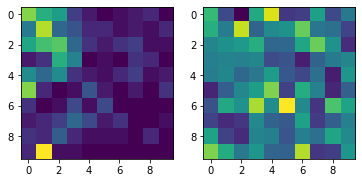

In [112]:
print(origin_x)
print(x)
print(b)
print(b_pred)
origin_x.detach()
o_x = origin_x.detach().numpy()
# plt.imshow(x.numpy())
plt.subplot(1,2,1)
plt.imshow(x.reshape(10,10))
plt.subplot(1,2,2)
plt.imshow(o_x.reshape(10,10))
plt.show()
# print(o_x.describe())

In [72]:
# Multi HeatMap training
A = Variable(torch.randn(50,100,dtype=float),requires_grad=True)
optimizer = optim.SGD([A],lr=0.001)
loss_fn = torch.nn.L1Loss(reduce=False, size_average=False)
num_epochs = 10000
for epoch in range(num_epochs):
    for i,image in enumerate(train_set):
        x = Variable(torch.tensor(image,dtype=float))
        mask = np.random.choice(100,50,replace=False)
        b = image.flat[mask]
        b = Variable(torch.tensor(b,dtype=float))
        optimizer.zero_grad()
        b_pred = torch.mv(A,x)
        # loss = ((b_pred-b)**2).sum()
        loss = loss_fn(b_pred,b).sum()
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(epoch,loss)

0 tensor(910.1614, dtype=torch.float64, grad_fn=<SumBackward0>)
100 tensor(272.3040, dtype=torch.float64, grad_fn=<SumBackward0>)
200 tensor(200.2320, dtype=torch.float64, grad_fn=<SumBackward0>)
300 tensor(220.2951, dtype=torch.float64, grad_fn=<SumBackward0>)
400 tensor(189.7315, dtype=torch.float64, grad_fn=<SumBackward0>)
500 tensor(151.0638, dtype=torch.float64, grad_fn=<SumBackward0>)
600 tensor(190.4859, dtype=torch.float64, grad_fn=<SumBackward0>)
700 tensor(287.5944, dtype=torch.float64, grad_fn=<SumBackward0>)
800 tensor(198.2663, dtype=torch.float64, grad_fn=<SumBackward0>)
900 tensor(174.1867, dtype=torch.float64, grad_fn=<SumBackward0>)
1000 tensor(135.1232, dtype=torch.float64, grad_fn=<SumBackward0>)
1100 tensor(234.2158, dtype=torch.float64, grad_fn=<SumBackward0>)
1200 tensor(166.7627, dtype=torch.float64, grad_fn=<SumBackward0>)
1300 tensor(226.6708, dtype=torch.float64, grad_fn=<SumBackward0>)
1400 tensor(191.0183, dtype=torch.float64, grad_fn=<SumBackward0>)
1500 te

In [62]:
print(A)
num = 2
origin_x = Variable(torch.randn(100,dtype=float),requires_grad=True)
A.requires_grad = False
optimizer = optim.SGD([origin_x],lr = 0.001)
x = Variable(torch.tensor(test_set[num],dtype=float))
mask = np.random.choice(100,50,replace=False)
b = test_set[num].flat[mask]
b = Variable(torch.tensor(b,dtype=float))
for i in range(2):
    optimizer.zero_grad()
    b_pred = torch.mv(A,origin_x)
    loss = ((b_pred-b)**2).sum()
    loss.backward()
    optimizer.step()
    print(i,loss)

tensor([[-2.7101e+44, -2.5797e+44, -7.3718e+44,  ...,  7.3656e+42,
         -4.8579e+43, -7.1129e+36],
        [ 1.7838e+44,  1.6980e+44,  4.8521e+44,  ..., -4.8480e+42,
          3.1974e+43,  4.6817e+36],
        [-3.8282e+44, -3.6440e+44, -1.0413e+45,  ...,  1.0404e+43,
         -6.8621e+43, -1.0047e+37],
        ...,
        [-2.4172e+43, -2.3009e+43, -6.5751e+43,  ...,  6.5696e+41,
         -4.3329e+42, -6.3442e+35],
        [ 6.5795e+43,  6.2630e+43,  1.7897e+44,  ..., -1.7882e+42,
          1.1794e+43,  1.7269e+36],
        [ 1.1082e+44,  1.0549e+44,  3.0144e+44,  ..., -3.0119e+42,
          1.9864e+43,  2.9086e+36]], dtype=torch.float64)
0 tensor(2.8935e+92, dtype=torch.float64, grad_fn=<SumBackward0>)
1 tensor(3.4162e+271, dtype=torch.float64, grad_fn=<SumBackward0>)


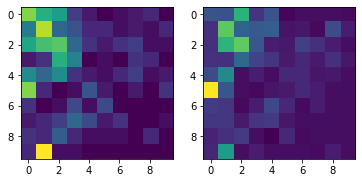

count     1.000000e+02
mean     8.080464e+177
std                inf
min     -2.664855e+177
25%      4.139862e+175
50%      3.043234e+177
75%      9.257098e+177
max      7.242988e+178
dtype: float64


In [63]:
origin_x.detach()
o_x = origin_x.detach().numpy()
# plt.imshow(x.numpy())
plt.subplot(1,2,1)
plt.imshow(x.reshape(10,10))
plt.subplot(1,2,2)
plt.imshow(o_x.reshape(10,10))
plt.show()
# print(o_x.describe())
print(pd.Series(o_x).describe())

In [ ]:
print(train_set.shape)

In [64]:
A = Variable(torch.randn(50,100,dtype=float),requires_grad=True)
b = Variable(torch.tensor(b,dtype=float))
x = Variable(torch.tensor(x,dtype=float))

optimizer = optim.SGD([A],lr=0.01)

num_epochs = 10000
for epoch in range(num_epochs):
    optimizer.zero_grad()
    b_pred = torch.mv(A,x)
    loss = ((b_pred-b)**2).sum()
    loss.backward()
    optimizer.step()
    if epoch % 5 == 0:
        print(epoch,loss)

b_pred = torch.mv(A,x)
print(b_pred)
print("A:\n",A)

RuntimeError: grad can be implicitly created only for scalar outputs

In [ ]:
origin_x = Variable(torch.randn(100,dtype=float),requires_grad=True)
optimizer = optim.SGD([origin_x],lr=0.01)

num_epochs = 1
for epoch in range(num_epochs):
    optimizer.zero_grad()
    b_pred = torch.mv(A,origin_x)
    loss = ((b_pred-b)**2).sum()
    loss.backward()
    optimizer.step()

    if epoch % 5 == 0:
        print(epoch,loss)

In [ ]:
origin_xx = Variable(torch.randn(100,dtype=float))
plt.imshow(origin_xx.reshape(10,10))
plt.show()

In [ ]:
plt.subplot(1,2,1)
plt.imshow(x.reshape(10,10))
plt.subplot(1,2,2)
plt.imshow(origin_x.detach().reshape(10,10))
plt.show()